# WZL Automobile Data processing

Objective: identify if a coil is somehow different from existing observations.()

In [11]:
import csv
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
#from scipy import stats
import tensorflow as tf
#import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import io
import os

path=r"/home/nvidia"
filename = path + '/Datenbasis_Gefiltert.csv'
df = pd.read_csv(filename, usecols=['Position', 'CoilNumber','ProgramNumber630','Banddicke1','Banddicke2','Banddicke3','Banddicke','Impoc'])
#df = df.dropna(axis=0,subset=['Banddicke2','Impoc'])


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Step 2

After loading the Columns we wanted, we'd better combine the two table(with producer)

In [12]:
zrd=pd.read_csv(os.path.join(path,'Zuordnung.csv'),header=0,sep=',')
zrd.rename(index=str,columns ={'programm_coil':'ProgramNumber630',
'material gemaess SAP':'Material',
'Hersteller/Schluessel':'Hersteller'},inplace = True)
print('length zrd {:d}'.format(len( zrd.loc[:,'ProgramNumber630'].unique() ) ) )
print('length df {:d}' .format(len( df.loc[:,'ProgramNumber630'].unique() ) ) )
print(df.shape)

df=pd.merge(df, zrd, how='left', on=['ProgramNumber630'])
print(df.shape)
df.to_pickle(os.path.join(path,'Datenbasis_Gefiltert_zusammengefuehrt.csv'))
df

length zrd 19
length df 16
(1595738, 8)
(1595738, 11)


,ProgramNumber630,Position,CoilNumber,Banddicke,Banddicke1,Banddicke2,Banddicke3,Impoc,Material,Hersteller,Coilbreite
0,130,5.504,962167,0.7,NaN,NaN,NaN,2426.0,DX54D + Z100 MCO,CV,1550
1,130,8.944,962167,0.7,NaN,NaN,NaN,2671.0,DX54D + Z100 MCO,CV,1550
2,130,12.384,962167,0.7,NaN,NaN,NaN,2715.0,DX54D + Z100 MCO,CV,1550
3,130,15.824,962167,0.7,NaN,NaN,NaN,2798.0,DX54D + Z100 MCO,CV,1550
4,130,19.264,962167,0.7,NaN,NaN,NaN,2913.0,DX54D + Z100 MCO,CV,1550
5,130,22.704,962167,0.7,NaN,NaN,NaN,2866.0,DX54D + Z100 MCO,CV,1550
6,130,26.144,962167,0.7,NaN,NaN,NaN,2814.0,DX54D + Z100 MCO,CV,1550
7,130,29.584,962167,0.7,NaN,NaN,NaN,2804.0,DX54D + Z100 MCO,CV,1550
8,130,33.024,962167,0.7,NaN,NaN,NaN,2794.0,DX54D + Z100 MCO,CV,1550
9,130,36.464,962167,0.7,NaN,NaN,NaN,2778.0,DX54D + Z100 MCO,CV,1550


## Step 3

* denoising

1. dropna
2. delete duplicate
3. choose only one Hersteller.

In [13]:
# as for the precision round(3)
df.dropna(axis=0, how='any',inplace=True)
df.round(3)
df.drop_duplicates(subset=['Position'],inplace=True)
df.shape

(539394, 11)

## Step 3.1 

let's say we choose the `Hersteller CV` and the `Branddicke=0.7`


In [46]:
df_cv = df.loc[(df['Hersteller'] == 'CV') & (df['Banddicke'] == 0.7)]
#df_cv = df_cv.drop(columns = ['CoilNumber','Material','Hersteller'])
df_cv

,ProgramNumber630,Position,CoilNumber,Banddicke,Banddicke1,Banddicke2,Banddicke3,Impoc,Material,Hersteller,Coilbreite
57936,120,5.382,9609201,0.7,0.700,0.700,0.677,2295.0,DX54D + Z100 MCO,CV,1550
57937,120,8.821,9609201,0.7,0.700,0.700,0.676,2652.0,DX54D + Z100 MCO,CV,1550
57938,120,12.260,9609201,0.7,0.700,0.699,0.665,2783.0,DX54D + Z100 MCO,CV,1550
57940,120,19.138,9609201,0.7,0.698,0.700,0.674,2607.0,DX54D + Z100 MCO,CV,1550
57942,120,26.016,9609201,0.7,0.698,0.699,0.674,2685.0,DX54D + Z100 MCO,CV,1550
57943,120,29.455,9609201,0.7,0.699,0.699,0.673,2719.0,DX54D + Z100 MCO,CV,1550
57944,120,32.894,9609201,0.7,0.700,0.699,0.673,2644.0,DX54D + Z100 MCO,CV,1550
57949,120,50.089,9609201,0.7,0.702,0.699,0.675,2497.0,DX54D + Z100 MCO,CV,1550
57950,120,53.528,9609201,0.7,0.698,0.698,0.674,2642.0,DX54D + Z100 MCO,CV,1550
57951,120,56.967,9609201,0.7,0.698,0.699,0.675,2607.0,DX54D + Z100 MCO,CV,1550


## Step 4

before we start our training, we can take a deeper look inside of our data to say what's good or not.

1. group the data by the coilnumber

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


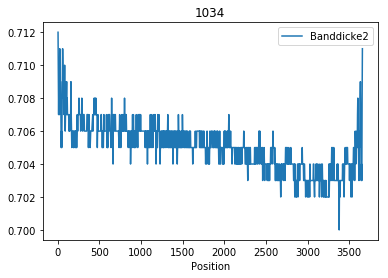

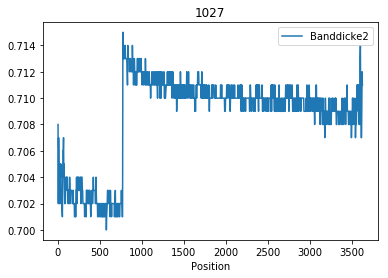

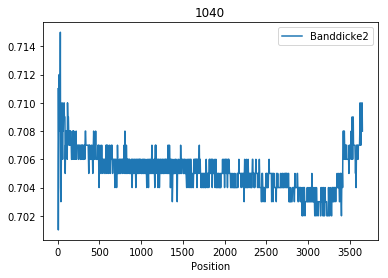

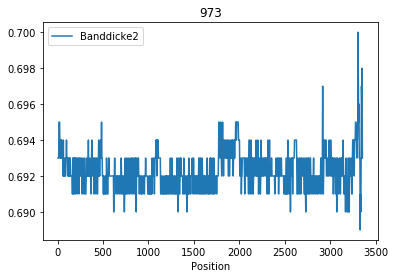

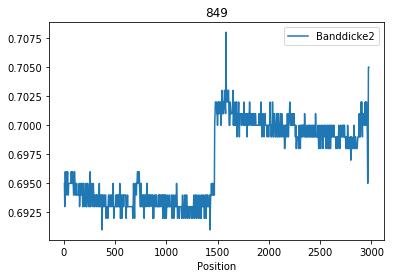

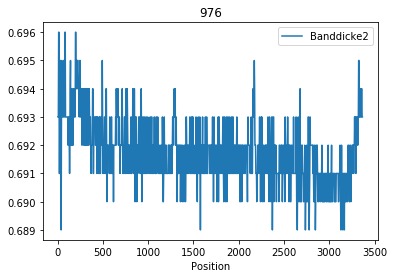

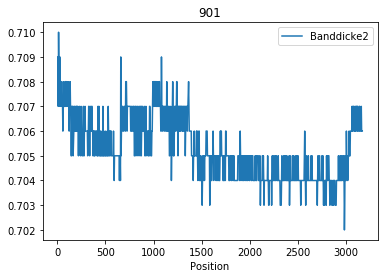

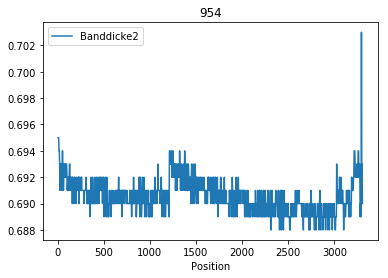

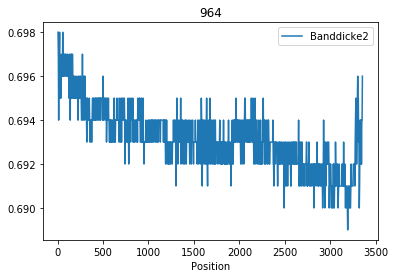

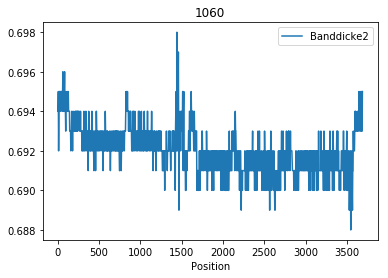

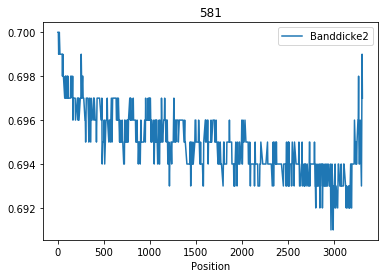

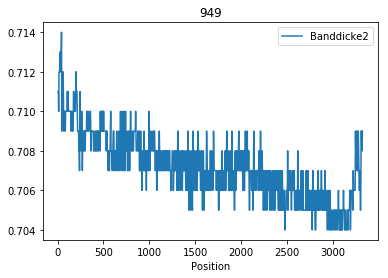

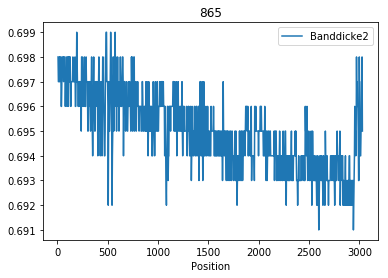

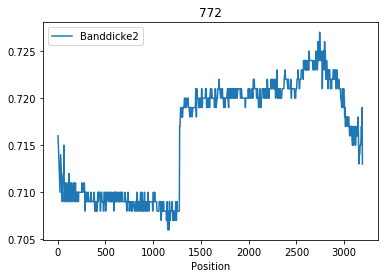

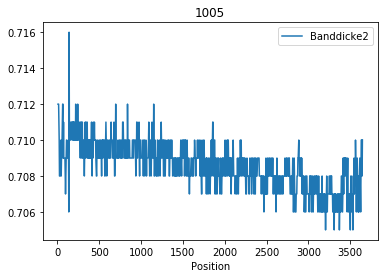

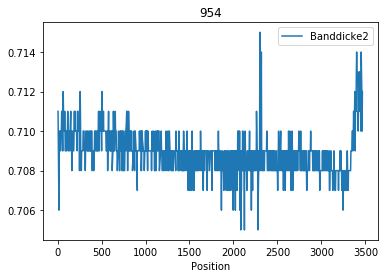

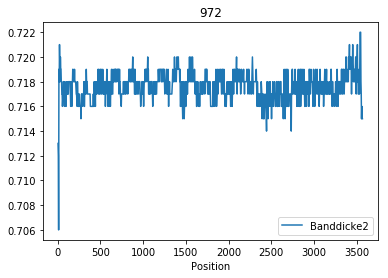

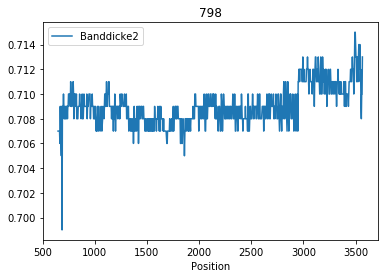

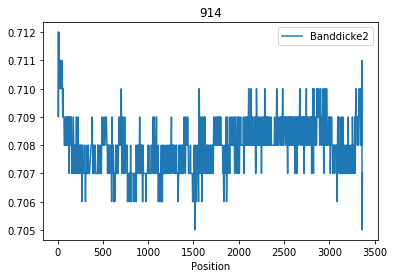

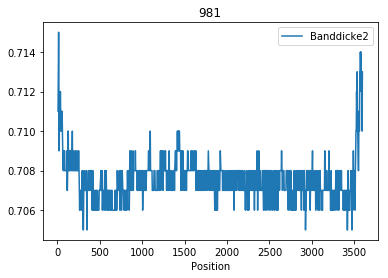

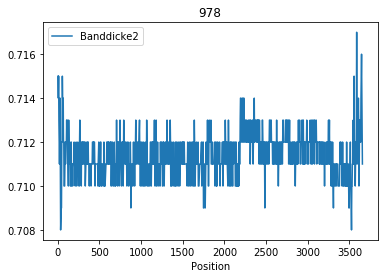

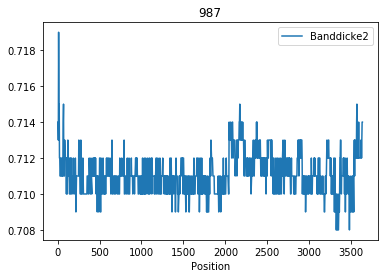

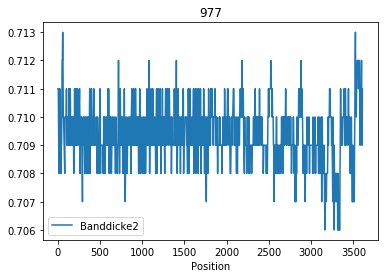

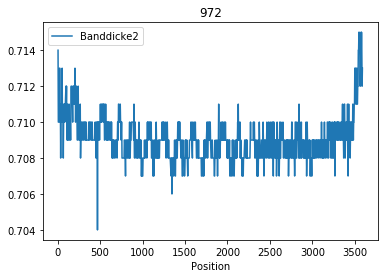

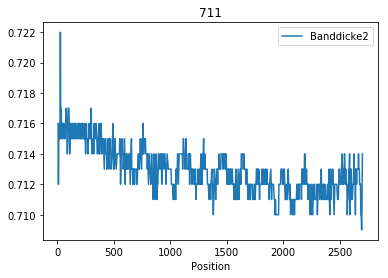

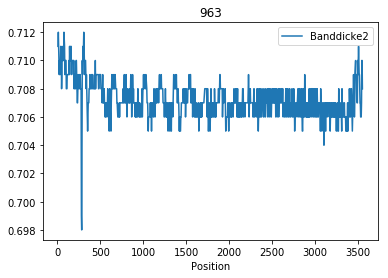

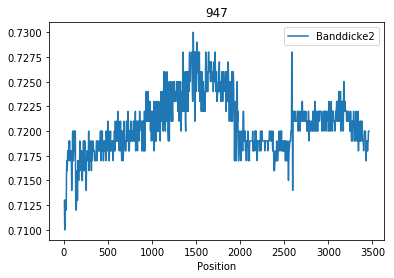

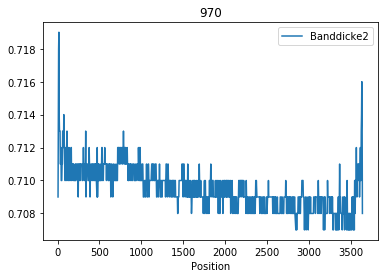

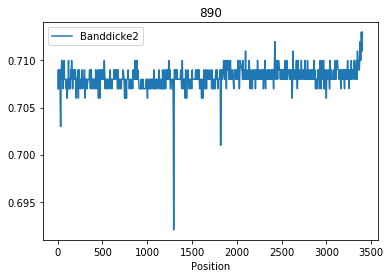

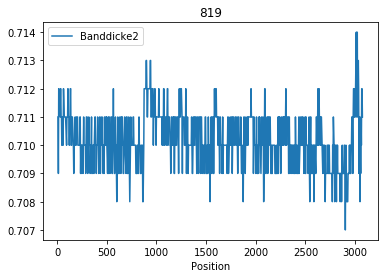

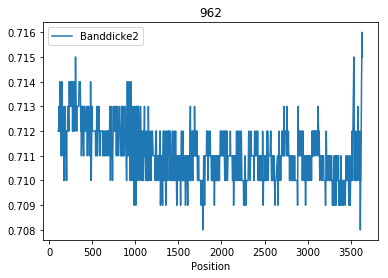

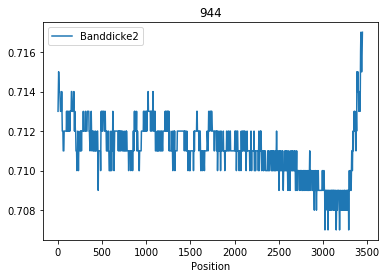

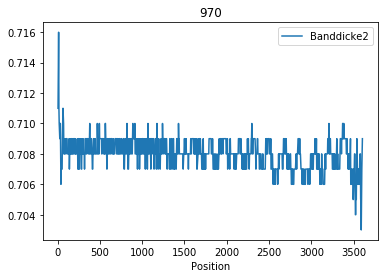

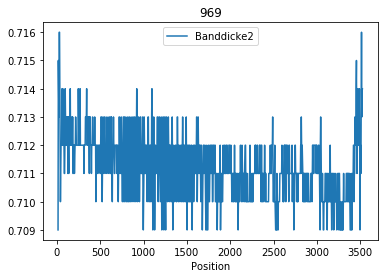

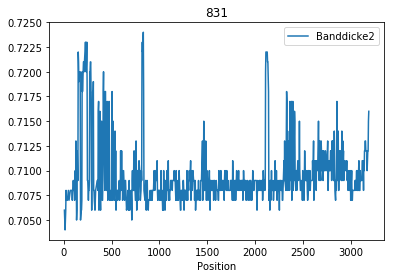

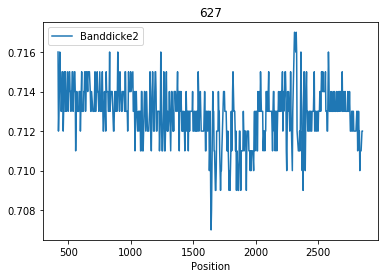

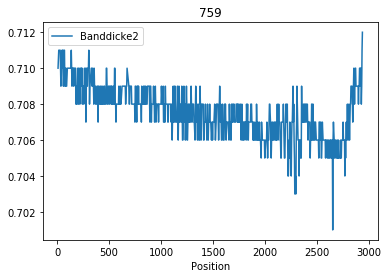

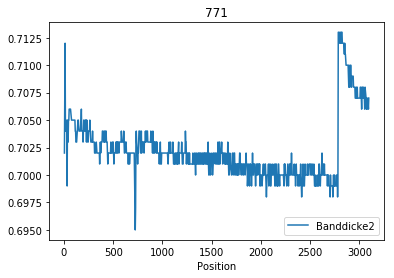

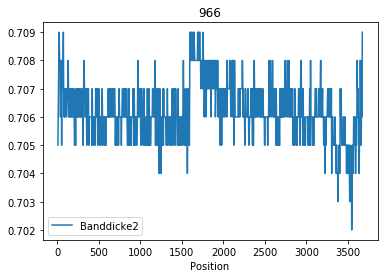

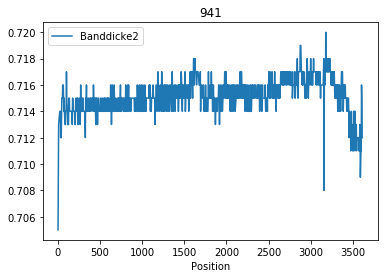

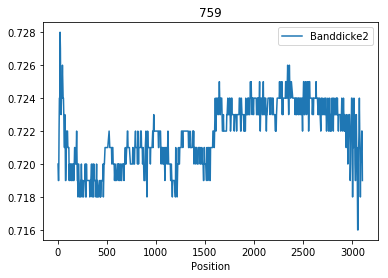

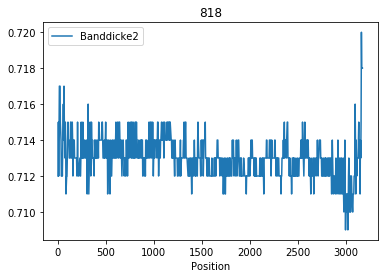

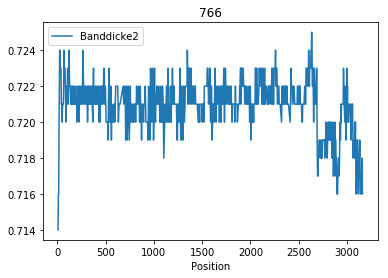

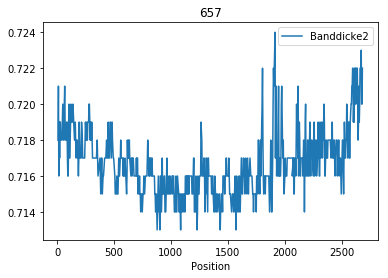

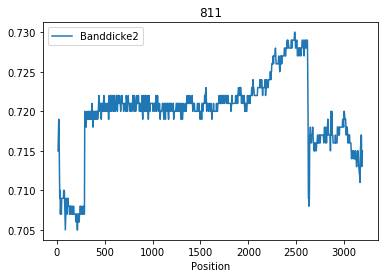

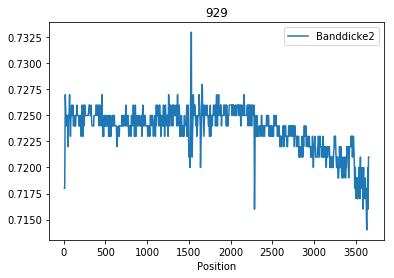

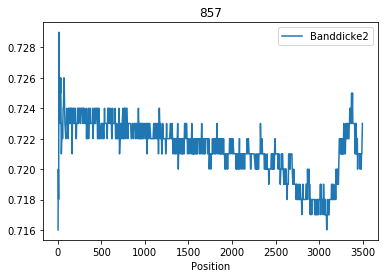

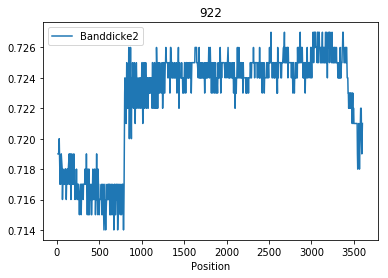

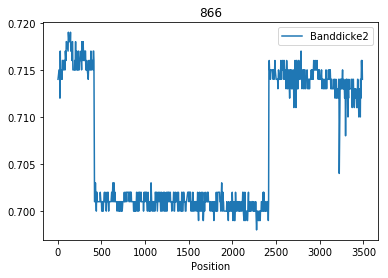

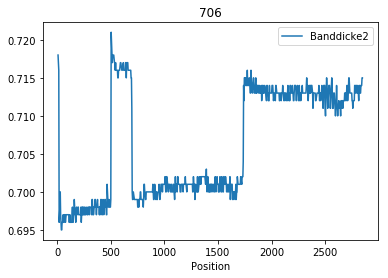

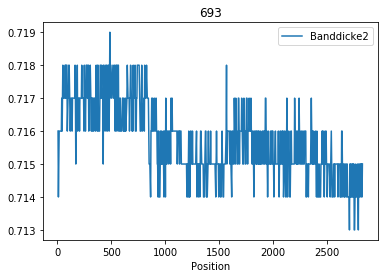

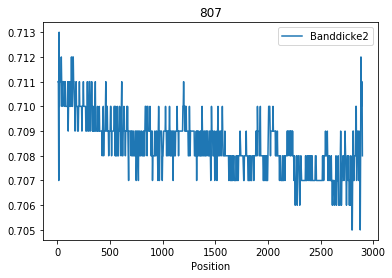

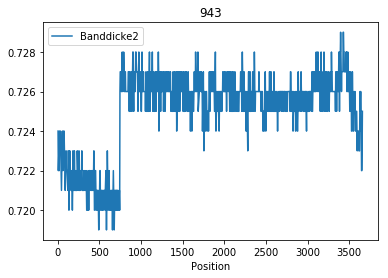

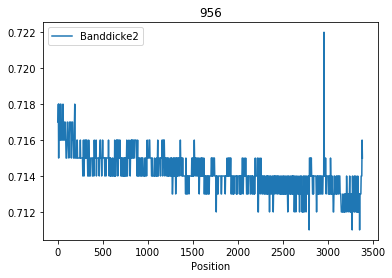

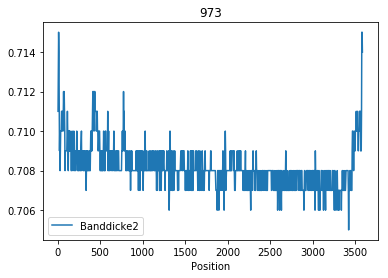

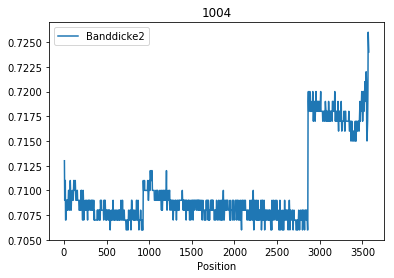

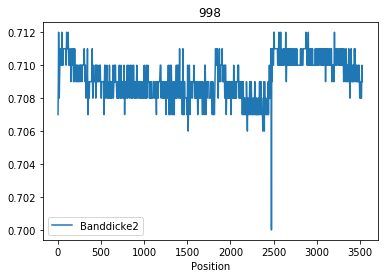

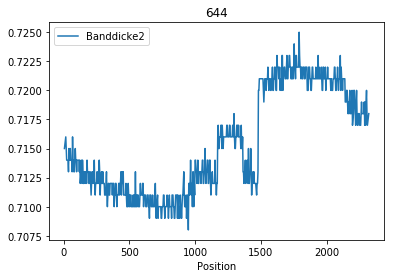

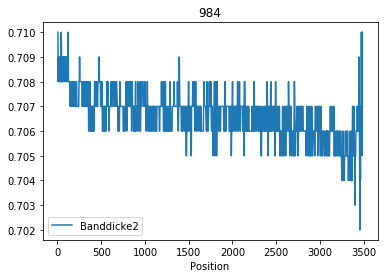

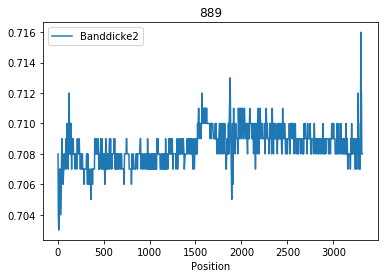

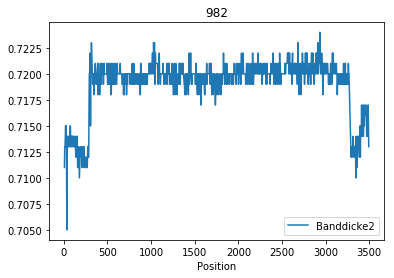

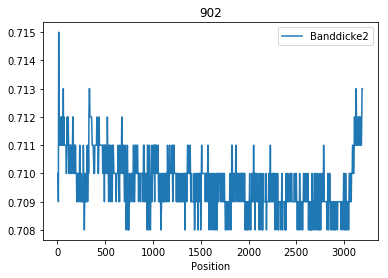

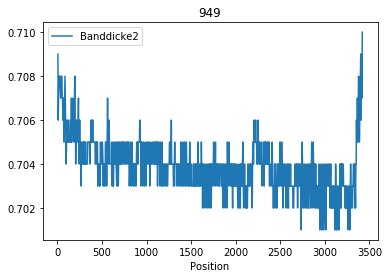

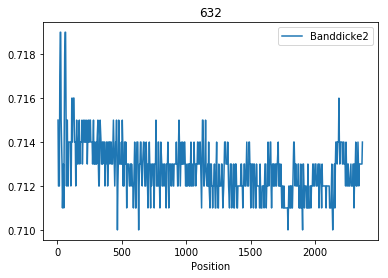

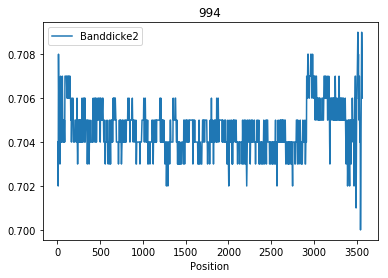

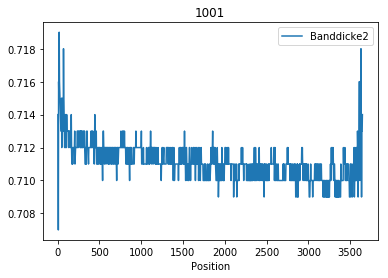

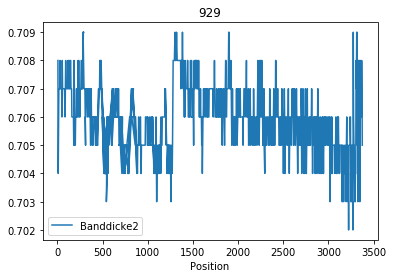

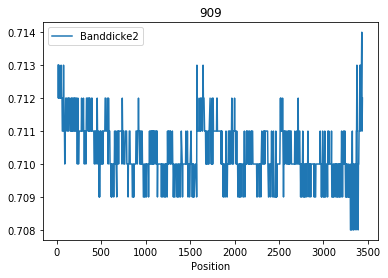

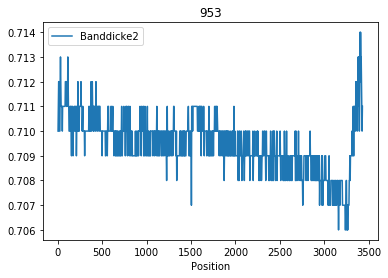

In [66]:
coilNr = df_cv.drop_duplicates(subset=['CoilNumber'], keep='last', inplace=False).CoilNumber.values # it will return a series.
i=1
for s in df_cv.groupby('CoilNumber'):
    if(s[1].size<6000):
        continue
    xx = pd.DataFrame({'Position':s[1]['Position'].values,'Banddicke2':s[1]['Banddicke2'].values})
    #print(s[1].size)
    xx.plot(x='Position',y='Banddicke2',title=s[1].shape[0])

## Step 4.1 Setup the Autoencoder based on Tensorflow

here


In [47]:
# reform the data into matrix as a unit
# s in df_cv.groupby('CoilNumber'):
import random

df_matrix = pd.DataFrame([])

# how long the step size should be
Step = 6

for s in df_cv.groupby('CoilNumber'):
    
    #matrx = pd.DataFrame([s[1].Position.values, s[1].Banddicke1.values, s[1].Banddicke2.values, s[1].Banddicke3.values])
    #matrx = np.split(',')
    #matrx = np.transpose(matrx)
    #comp = Step - (matrx.shape[0] % Step)
    #new = matrx[-1]
    #new = np.tile(new, comp)
    comp = Step - s[1].shape[0] % Step
    matrx = s[1].filter(items=['Position', 'Banddicke1','Banddicke2','Banddicke3'])
    length = matrx.shape[0]
    if(length < 600):
        continue
    ran = matrx[-1:]['Position'].values[0]
    for i in range(int(comp)):
        ranPos = round(random.uniform(1, ran), 3)
        d2 = pd.DataFrame([[ranPos,0.7,0.7,0.7]], columns= ['Position', 'Banddicke1', 'Banddicke2', 'Banddicke3'])
        matrx = matrx.append(d2)
    df_matrix = df_matrix.append(matrx)
    #print(s[1].filter(items=['Position', 'Banddicke1','Banddicke2','Banddick3']))
#df_matrix.drop('Position',axis = 1, inplace = True)
df_m = df_matrix.drop('Position',axis = 1)


In [48]:
df_matrix = df_cv.filter(items=['Position', 'Banddicke1','Banddicke2','Banddicke3'])
from sklearn.preprocessing import StandardScaler
df_m = df_matrix.drop('Position',axis = 1)

RANDOM_SEED = 48
df_m = df_m[1:63521]
X_train, X_test = train_test_split(df_m, test_size=0.2, random_state=RANDOM_SEED)
X_train.shape
X_test.shape
df_m.shape



(63520, 3)

* 3x3 network(3 layers encoders and 3 layers decoders).


In [49]:
from sklearn.preprocessing import StandardScaler

RANDOM_SEED = 48

X_train, X_test = train_test_split(df_m, test_size=0.2, random_state=RANDOM_SEED)

X_train = X_train.values
X_test = X_test.values


X_train = X_train.reshape(int(len(X_train)/794), 3*794)
X_test = X_test.reshape(int(len(X_test)/794), 3*794)

input_dim = X_train.shape[1]
encoding_dim = 100

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 5), activation="relu")(encoder)
encoder = Dense(int(encoding_dim / 25), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 5), activation='tanh')(encoder)
decoder = Dense(int(encoding_dim / 25), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)


## Step 5
train the module for 100 Epoch

In [50]:
import h5py

nb_epoch = 200
batch_size = 5
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history



Train on 64 samples, validate on 16 samples
Epoch 1/200
64/64 [==============================] - 1s 20ms/step - loss: 0.4855 - acc: 0.0000e+00 - val_loss: 0.4618 - val_acc: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 6ms/step - loss: 0.4430 - acc: 0.0000e+00 - val_loss: 0.4180 - val_acc: 0.0000e+00
Epoch 3/200
64/64 [==============================] - 0s 6ms/step - loss: 0.4019 - acc: 0.0000e+00 - val_loss: 0.3800 - val_acc: 0.0000e+00
Epoch 4/200
64/64 [==============================] - 0s 6ms/step - loss: 0.3681 - acc: 0.0000e+00 - val_loss: 0.3507 - val_acc: 0.0000e+00
Epoch 5/200
64/64 [==============================] - 0s 6ms/step - loss: 0.3403 - acc: 0.0000e+00 - val_loss: 0.3261 - val_acc: 0.0000e+00
Epoch 6/200
64/64 [==============================] - 0s 6ms/step - loss: 0.3184 - acc: 0.0000e+00 - val_loss: 0.3067 - val_acc: 0.0000e+00
Epoch 7/200
64/64 [==============================] - 0s 6ms/step - loss: 0.3015 - acc: 0.0000e+00 - val_loss: 0.2918 - va

64/64 [==============================] - 0s 4ms/step - loss: 0.2538 - acc: 0.0000e+00 - val_loss: 0.2523 - val_acc: 0.0000e+00
Epoch 118/200
64/64 [==============================] - 0s 4ms/step - loss: 0.2540 - acc: 0.0000e+00 - val_loss: 0.2524 - val_acc: 0.0000e+00
Epoch 119/200
64/64 [==============================] - 0s 4ms/step - loss: 0.2540 - acc: 0.0000e+00 - val_loss: 0.2521 - val_acc: 0.0000e+00
Epoch 120/200
64/64 [==============================] - 0s 5ms/step - loss: 0.2536 - acc: 0.0000e+00 - val_loss: 0.2518 - val_acc: 0.0000e+00
Epoch 121/200
64/64 [==============================] - 0s 5ms/step - loss: 0.2534 - acc: 0.0000e+00 - val_loss: 0.2517 - val_acc: 0.0000e+00
Epoch 122/200
64/64 [==============================] - 0s 5ms/step - loss: 0.2537 - acc: 0.0000e+00 - val_loss: 0.2524 - val_acc: 0.0000e+00
Epoch 123/200
64/64 [==============================] - 0s 4ms/step - loss: 0.2538 - acc: 0.0000e+00 - val_loss: 0.2526 - val_acc: 0.0000e+00
Epoch 124/200
64/64 [======

Epoch 175/200
64/64 [==============================] - 0s 4ms/step - loss: 0.2533 - acc: 0.0000e+00 - val_loss: 0.2515 - val_acc: 0.0000e+00
Epoch 176/200
64/64 [==============================] - 0s 4ms/step - loss: 0.2534 - acc: 0.0000e+00 - val_loss: 0.2516 - val_acc: 0.0000e+00
Epoch 177/200
64/64 [==============================] - 0s 5ms/step - loss: 0.2535 - acc: 0.0000e+00 - val_loss: 0.2522 - val_acc: 0.0000e+00
Epoch 178/200
64/64 [==============================] - 0s 5ms/step - loss: 0.2534 - acc: 0.0000e+00 - val_loss: 0.2518 - val_acc: 0.0000e+00
Epoch 179/200
64/64 [==============================] - 0s 4ms/step - loss: 0.2535 - acc: 0.0000e+00 - val_loss: 0.2517 - val_acc: 0.0000e+00
Epoch 180/200
64/64 [==============================] - 0s 4ms/step - loss: 0.2532 - acc: 0.0000e+00 - val_loss: 0.2518 - val_acc: 0.0000e+00
Epoch 181/200
64/64 [==============================] - 0s 5ms/step - loss: 0.2536 - acc: 0.0000e+00 - val_loss: 0.2521 - val_acc: 0.0000e+00
Epoch 182/200

## 5.1 Evaluation
the current paraments works very promising

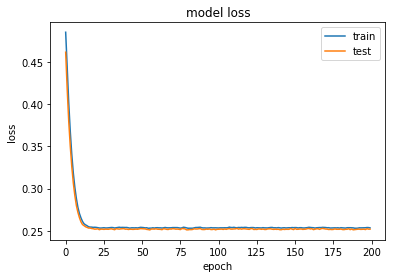

In [51]:
autoencoder = load_model('model.h5')

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)


### 5.1.1 prediction

In [54]:
error_df = pd.DataFrame({'reconstruction_error': mse})
error_df.describe()

,reconstruction_error
count,16.000000
mean,0.210929
std,0.000151
min,0.210617
25%,0.210845
50%,0.210921
75%,0.211019
max,0.211212


okay  according to the result, we concurrently set the threshold as 0.2019

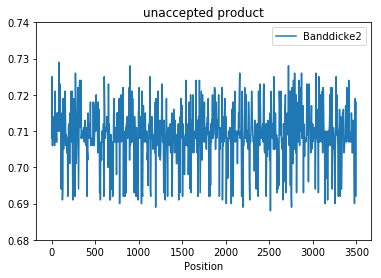

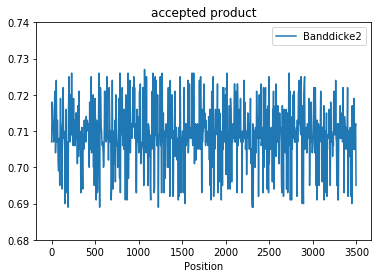

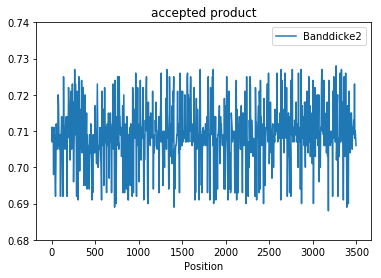

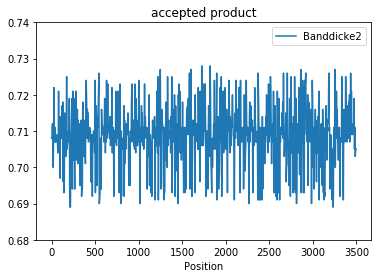

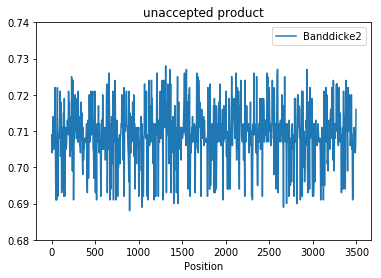

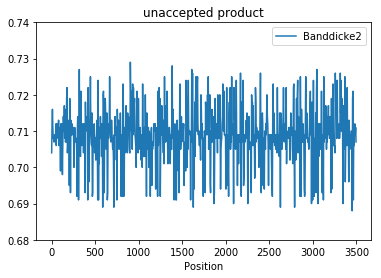

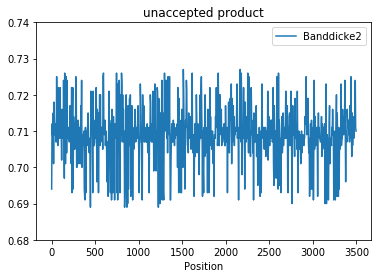

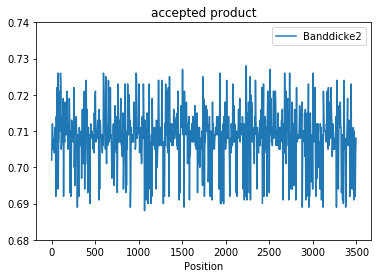

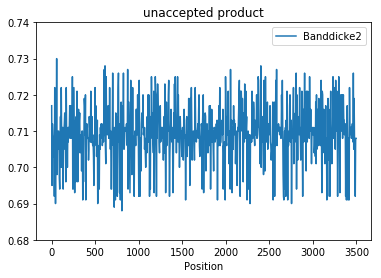

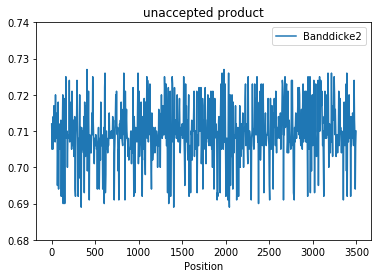

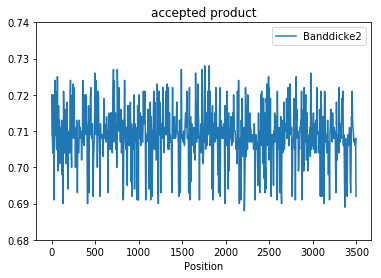

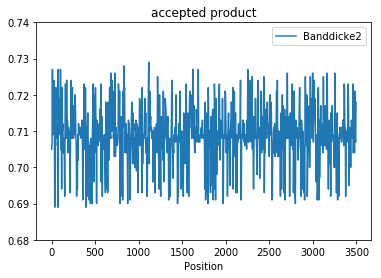

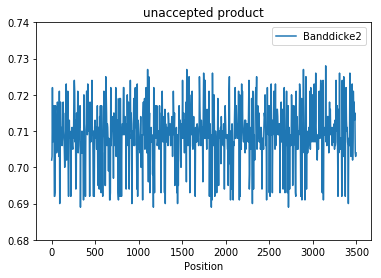

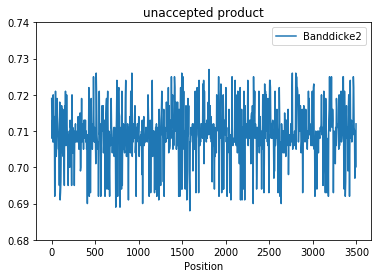

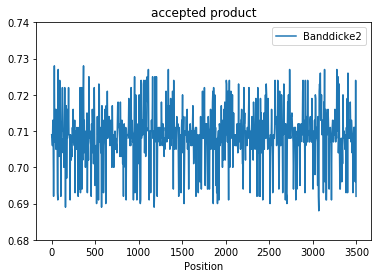

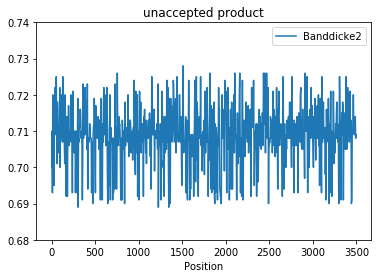

In [64]:
l = len(X_test)
thes =0.2109
for i in range(l):
    error = np.mean(np.power(X_test[i] - predictions[i], 2))     
 
    #plt.plot(X_test[i][1:3*937:3])
    x = X_test[i][1:3*794:3]
    y = np.arange(1,3500,3500/794)
    xx = pd.DataFrame({'Position':y,'Banddicke2':x})
    if(error>thes):
        #plt.title('unaccepted product') #subplot 211 title
        xx.plot(x='Position',y='Banddicke2',title='unaccepted product',ylim =(0.68,0.74))
    else:
        #plt.title('accepted product') #subplot 211 titl
        xx.plot(x='Position',y='Banddicke2',title='accepted product',ylim =(0.68,0.74))
    
    #plt.ylim((0.65,0.73))
    #plt.show()
